In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [6]:
coumn_names = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'restecg', 'max_heartrate', 'exang', 'st_depression', 'slope', 'ca', 'thal', 'num']

cleveland_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.cleveland.data')
cleveland_data.columns = coumn_names
cleveland_data['source'] = 'cleveland'
switzerland_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.switzerland.data')
switzerland_data.columns = coumn_names
switzerland_data['source'] = 'switzerland'
va_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.va.data')
va_data.columns = coumn_names
va_data['source'] = 'va'
hungarian_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.hungarian.data')
hungarian_data.columns = coumn_names
hungarian_data['source'] = 'hungary'

frames = [cleveland_data, switzerland_data, va_data, hungarian_data]
data = pd.concat(frames)

data = data.replace('?', np.nan)

data.age = data.age.astype('int')

data = data.dropna()
data.sex = data.sex.astype('int')
data.sex = data.sex.apply(lambda value: 'male' if value == 1 else 'female')
data.sex = pd.Categorical(data.sex, categories=['male', 'female'])

data.chest_pain = data.chest_pain.astype('int')
data.chest_pain = pd.Categorical(data.chest_pain, categories=[1, 2, 3, 4])
data.chest_pain = data.chest_pain.apply(lambda value: 'typical angina' if value == 1 else 'atypical angina' if value != 3 else 'non-anginal pain' if value != 4 else 'asymptomatic')
data.chest_pain = pd.Categorical(data.chest_pain, categories=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
data.resting_blood_pressure = data.resting_blood_pressure.astype('float64')
data.cholestoral = data.cholestoral.astype('float64')
data.fasting_blood_sugar = data.fasting_blood_sugar.astype('float64')
data.restecg = data.restecg.astype('int')
data.restecg = data.restecg.apply(lambda value: 'normal' if value == 0 else 'ST-T wave abnormality' if value != 2 else 'left ventricular hypertrophy')
data.restecg = pd.Categorical(data.restecg, categories=['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'])
data.max_heartrate = data.max_heartrate.astype('float64')
data.exang = data.exang.astype('int')
data.exang = data.exang.apply(lambda value: 'yes' if value == 1 else 'no')
data.exang = pd.Categorical(data.exang, categories=['yes', 'no'])
data.st_depression = data.st_depression.astype('float64')
data.slope = data.slope.astype('int')
data.slope = data.slope.apply(lambda value: 'upsloping' if value == 1 else 'flat' if value != 3 else 'downsloping')
data.slope = pd.Categorical(data.slope, categories=['upsloping', 'flat', 'downsloping'])
data.ca = data.ca.astype('float')
data.ca = data.ca.astype('int')
data.thal = data.thal.astype('float')
data.thal = data.thal.astype('int')
data.thal = data.thal.apply(lambda value: 'normal' if value == 3 else 'fixed defect' if value != 7 else 'reversable defect')
data.thal = pd.Categorical(data.thal, categories=['normal', 'fixed defect', 'reversable defect'])
data.source = pd.Categorical(data.source, categories=['cleveland', 'va', 'hungary', 'switzerland'])
data.fasting_blood_sugar = data.fasting_blood_sugar.astype('int')
data.fasting_blood_sugar = data.fasting_blood_sugar.apply(lambda value: 'true' if value == 1 else 'false')
data.fasting_blood_sugar = pd.Categorical(data.fasting_blood_sugar, categories=['true', 'false'])

In [5]:
# data = data[data['wage per hour'] > 0]
data.describe()

,age,resting_blood_pressure,cholestoral,max_heartrate,st_depression,ca,num
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.493289,131.671141,246.832215,149.325503,1.054362,0.674497,0.949664
std,9.032021,17.760829,52.614845,23.159920,1.162488,0.938202,1.231250
min,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,132.250000,0.000000,0.000000,0.000000
50%,56.000000,130.000000,242.500000,152.500000,0.800000,0.000000,0.000000
75%,61.000000,140.000000,275.750000,165.750000,1.600000,1.000000,2.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


The dadadescriptions shows the age range seems to be well distributed with a man of 54. However, this might not be a good representation of the whole population since age in switzerland and hungare for example is 43 years. I am not in the position to make any statements on whether resting blood pressure, cholesteral or max haert rate are well distributed or not. I am even less able to make any statements on st-depression, ca or num values. The most interesting values to me seem to be age, resting blood pressure and max heartrate. Therefore, these are the variables I will further explore.

Text(0.5, 0, 'age')

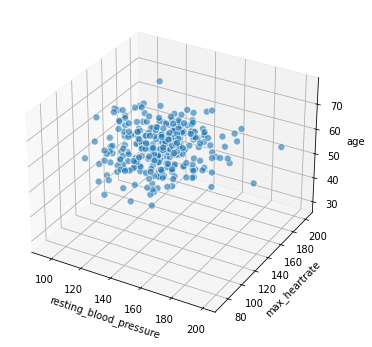

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

columns = ['resting_blood_pressure', 'max_heartrate', 'age']

xs = data['resting_blood_pressure']
ys = data['max_heartrate']
zs = data['age']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('resting_blood_pressure')
ax.set_ylabel('max_heartrate')
ax.set_zlabel('age')

It is difficult to discern any trends, structures or groupings in this plot. Most values seem to be clumpted together in the upper value range of max_heartrate and the lower value range of resting_blood_pressure but seem to be in the mid-value range of age. According to a google search (https://www.nia.nih.gov/health/high-blood-pressure-and-older-adults), normal blood pressure is located between 80 and 120. It seems that most datapoints have a lower value for this variable. However, bloodpressure is usually given in a number pair ("The first number, called systolic blood pressure, is the pressure caused by your heart contracting and pushing out blood. The second number, called diastolic blood pressure, is the pressure when your heart relaxes and fills with blood."). Here, only one value is given.

In [8]:
subsample_data = data[columns]
subsample_data.describe()

,resting_blood_pressure,max_heartrate,age
count,298.000000,298.000000,298.000000
mean,131.671141,149.325503,54.493289
std,17.760829,23.159920,9.032021
min,94.000000,71.000000,29.000000
25%,120.000000,132.250000,48.000000
50%,130.000000,152.500000,56.000000
75%,140.000000,165.750000,61.000000
max,200.000000,202.000000,77.000000


### MDS

Here is the same plot as before but with the filtering applied.

In [10]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, max_iter=100, dissimilarity='euclidean', n_jobs=2, n_init=2)
mds_transformed = mds.fit_transform(subsample_data)

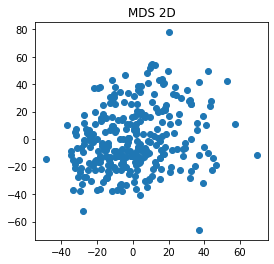

In [11]:
fig_mds = plt.figure(2, (10,4))

ax_mds = fig_mds.add_subplot(122)
plt.scatter(mds_transformed[:,0], mds_transformed[:,1])
plt.title('MDS 2D')
fig_mds.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

After the transformation, the same structure can be observed as in the plot showing the 3-D version. The distances seem to be well preserved. There are still no groupings or other structural changes to the clump.

### Isomap

One of the earliest approaches to manifold learning is the Isomap algorithm, short for Isometric Mapping. Isomap can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA. Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points. Isomap can be performed with the object Isomap. (Source: https://scikit-learn.org/stable/modules/manifold.html#isomap)

In [13]:
from sklearn.manifold import Isomap
from scipy import sparse

sparse_data = sparse.csr_array(subsample_data.values)

isomap = Isomap(n_components=2, n_neighbors=100)
isomap_transformed = isomap.fit_transform(sparse_data)

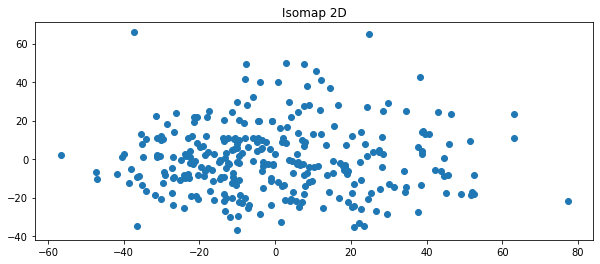

In [14]:
fig_isomap = plt.figure(2, (10,4))

ax_isomap = fig.add_subplot(122)
plt.scatter(isomap_transformed[:,0], isomap_transformed[:,1])
plt.title('Isomap 2D')
fig_isomap.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

Other than an elongation, the structure seems to be similar to the structure shown in the 3-D plot. Due to the elongation, the outliers are more distant now.

### PCA

In [15]:
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components=2, batch_size=200)
pca_transformed = pca.fit_transform(subsample_data)

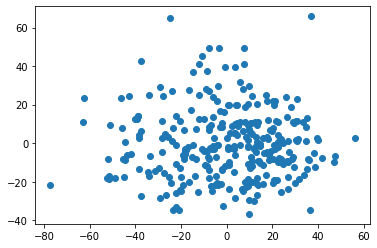

In [16]:
plot = plt.scatter(pca_transformed[:,0], pca_transformed[:,1])
plt.show()

Again, the structure has ben projected into 2 dimensions rather well. the same shape can be observed, however slightly elongated. Not es much as compared to the isomap-procedure.

### t-SNE

In [17]:
from sklearn.manifold import TSNE

tsne_transformed = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(subsample_data.values)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

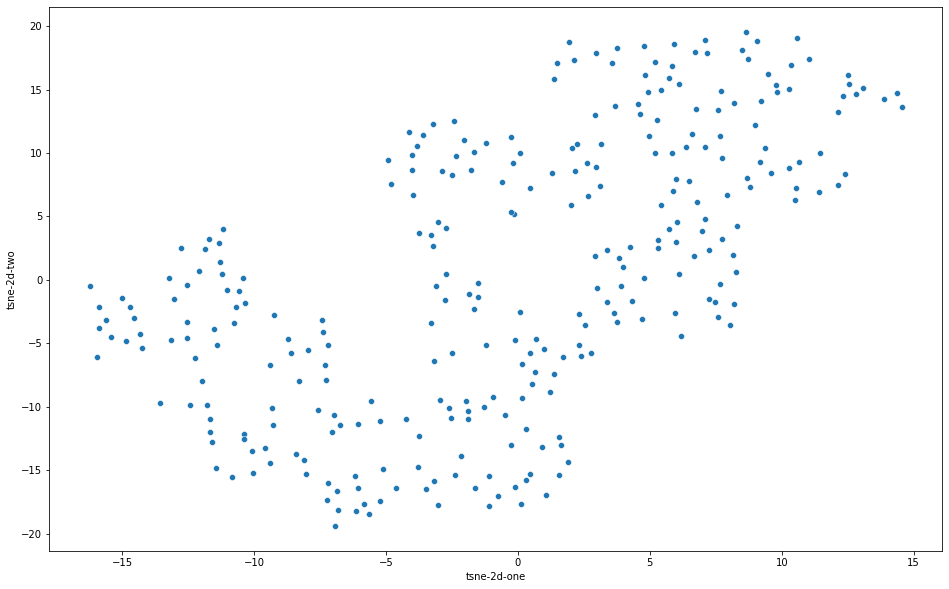

In [21]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_transformed[:,0]
df_subset['tsne-2d-two'] = tsne_transformed[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1
)

This plot differes considerably from the ones before. The shape is no longer retained. As with the large dataset, the plot shows a wider dispersion. However, patterns seem to be discernable. These patterns can't be observed in the 3-D plot. T-SNE seems to tend to cluster the datapoints due to how it deals with similarities (moving points closer to similar points, similarity is based on probabilities instead of euclidean distances and therefore the euclidean distance is not preserved).